In [2]:
import pandas as pd

df=pd.read_csv("C:/Users/Dhanesh/Downloads/Final_Project/guvi_courses.csv")

print("There are",len(df.columns),"columns which are:") #,df.columns)
for each in df.columns:
    print(each)

There are 12 columns which are:
course_id
course_title
url
price
num_subscribers
num_reviews
num_lectures
level
Rating
content_duration
published_timestamp
subject


In [3]:
#Dropping columns which dont affect ratings of a user
df.drop(['course_id','course_title','url','published_timestamp'],axis=1,inplace=True)
print("There are",len(df.columns),"columns left out which are:") #,df.columns)
for each in df.columns:
    print(each)

There are 8 columns left out which are:
price
num_subscribers
num_reviews
num_lectures
level
Rating
content_duration
subject


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3676 non-null   float64
 1   num_subscribers   3676 non-null   float64
 2   num_reviews       3676 non-null   float64
 3   num_lectures      3676 non-null   float64
 4   level             3676 non-null   object 
 5   Rating            3676 non-null   float64
 6   content_duration  3676 non-null   float64
 7   subject           3677 non-null   object 
dtypes: float64(6), object(2)
memory usage: 230.1+ KB
None


In [5]:
print("number of nulls:",df.isnull().sum())

number of nulls: price               4
num_subscribers     4
num_reviews         4
num_lectures        4
level               4
Rating              4
content_duration    4
subject             3
dtype: int64


In [6]:
#There are just 4 null rows so dropping them as it wont affect our data significantly"
df.dropna(axis=0,inplace=True)

In [7]:
print("Now the total number of nulls in our df are:",df.isnull().sum().sum())

Now the total number of nulls in our df are: 0


In [8]:
#As the level and subject columns are text based, lets encode them

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['level'] = label_encoder.fit_transform(df['level'])
df['subject'] = label_encoder.fit_transform(df['subject'])


In [9]:
#"Let's have a look at out dataframe"
print(df.head().to_string())

   price  num_subscribers  num_reviews  num_lectures  level  Rating  content_duration  subject
0    0.0         268923.0       8629.0          45.0      1    0.82              10.5        3
1    0.0         161029.0        279.0          27.0      2    0.69               3.5        3
2  200.0         121584.0      27445.0         342.0      1    0.89              43.0        3
3    0.0         120291.0       5924.0          30.0      0    0.78               3.0        3
4  200.0         114512.0      22412.0         304.0      1    0.55              30.5        3


In [10]:
print(df.tail().to_string())

      price  num_subscribers  num_reviews  num_lectures  level  Rating  content_duration  subject
3675   20.0              0.0          0.0          23.0      0    0.31          1.500000        2
3676  125.0              0.0          0.0           7.0      1    0.06          0.633333        2
3677   20.0              0.0          0.0           6.0      0    0.08          0.533333        2
3678   35.0              0.0          0.0          13.0      1    0.78          0.516667        2
3679   20.0              0.0          0.0          28.0      0    0.01          2.500000        2


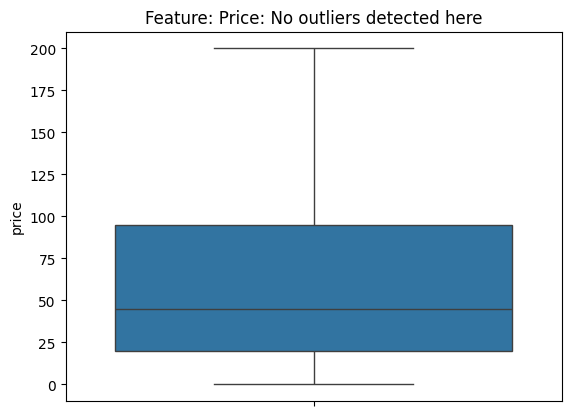

Text(0.5, 1.0, 'Feature: num_lectures: Upper outliers detected here')

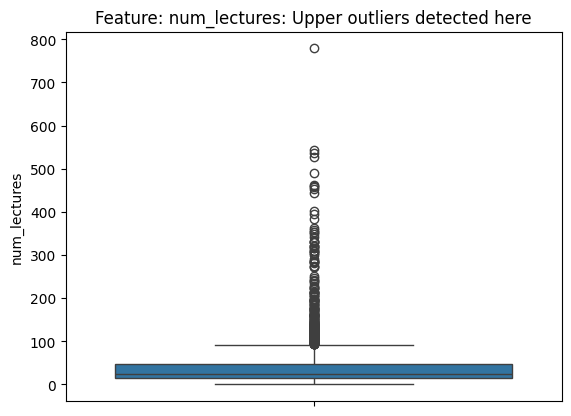

In [11]:
#------------------------------outlier starts here--------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['price'])
plt.title('Feature: Price: No outliers detected here')
plt.show()
sns.boxplot(df['num_lectures'])
plt.title('Feature: num_lectures: Upper outliers detected here')

Text(0.5, 1.0, 'Feature: content_duration: outliers detected here but we choose to keep them as course duration can change as is requirement')

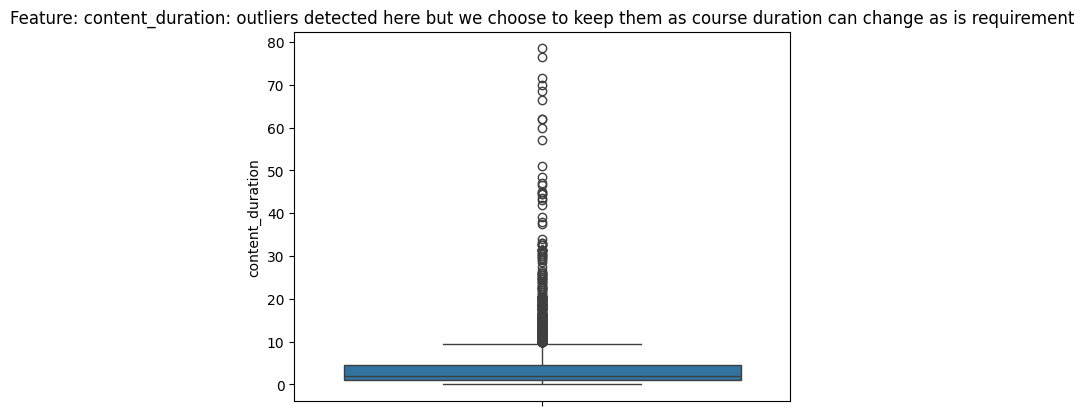

In [13]:
plt.show()
sns.boxplot(df['content_duration'])
plt.title('Feature: content_duration: outliers detected '
          'here but we choose to keep them as course duration can change as is requirement')


In [14]:
import numpy as np
Q1=np.percentile(df['num_lectures'],25)
Q3=np.percentile(df['num_lectures'],75)
IQR=Q3-Q1
upper= df['num_lectures']>=(Q3+1.5*IQR)
upper_outliers_index=np.where(upper)
lower= df['num_lectures']<=(Q1-1.5*IQR)
print("lower bound bound:")
lower_outliers_index=np.where(lower)

lower bound bound:


In [15]:
#dropping upper outliers from no. of lectures now"
for each in upper_outliers_index:
    df.drop(each,inplace=True)

In [16]:
#-------------------------collinearity starts here---------------------
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
#Now checking for collinearity
X = df[['price', 'num_subscribers', 'num_reviews','num_lectures','level',
        'content_duration','subject']]

X = sm.add_constant(X)

In [18]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

           Variable       VIF
0             const  4.280633
1             price  1.093276
2   num_subscribers  1.867162
3       num_reviews  1.842912
4      num_lectures  2.657797
5             level  1.001271
6  content_duration  2.570603
7           subject  1.060585


In [24]:
pip install xgboost


You should consider upgrading via the 'c:\users\dhanesh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [19]:
#"Let's try xgboost for our model"
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # , random_state=42)

# Create an XGBoost regressor object
model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error in XGBoost Regression:", mse)


Mean Squared Error in XGBoost Regression: 0.11742584802394608


In [20]:
# level and subject dropped here-------------
df.drop(['level','subject'],axis=1,inplace=True)

In [21]:
#let's try K-nn this time:"

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['price', 'num_subscribers', 'num_reviews','num_lectures',
        'content_duration']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error in k-nn is:", mse)

Mean Squared Error in k-nn is: 0.10868174298375184


In [22]:
#let's try K-nn this time:"

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['price', 'num_subscribers', 'num_reviews','num_lectures',
        'content_duration']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error in k-nn is:", mse)

Mean Squared Error in k-nn is: 0.10868174298375184


In [23]:
# --------------------num lectures dropped here-------------

df.drop(['num_lectures'],axis=1,inplace=True)

In [24]:
#"let's try k-nn now"
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['price', 'num_subscribers', 'num_reviews',
        'content_duration']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("K-nn Mean Squared Error:", mse)
print("knn r2 score",r2_score(y_test, y_pred))

K-nn Mean Squared Error: 0.11309351846381094
knn r2 score -0.05011916361728708


In [25]:
#"let's try multiple linear now..."
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
X = df[['price', 'num_subscribers', 'num_reviews',
        'content_duration']]
y = df['Rating']
# X=X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print("regression score in multiple linear now is:",regr.score(X_test, y_test))

regression score in multiple linear now is: 0.00182544735818857


In [27]:
#lets try xgboost again now as we have dropped number of lectures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['price', 'num_subscribers', 'num_reviews', 'content_duration']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = xgb.XGBRegressor()  # Use XGBRegressor for regression

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error in XGBoost Regression:", mse)


Mean Squared Error in XGBoost Regression: 0.11348436104664475
